<h1>PCA - Principal Component Analysis</h1>

PCA ist eine Methode, um die Dimension von Features zu reduzieren. 

Die Anwendungen von PCA mit Sklearn ist einfach umzusetzen und erfordert nur wenige Schritte.

PCA kann in den normalen Workflow mit eingebaut werden, um die wichtigsten Features eines Datasets herauszufinden und den Rest zu eliminieren. <br>
Es werden die Varianzen der Daten betrachtet, daraus ergeben sich die Komponenten der Features, genannt Principal Component.

Mit weniger Features ergibt sich eine bessere Übersicht und der Bedarf an der benötigten Rechenleistung für das Trainieren sinkt.

<i>Abb1</i>:  Dataset mit vielen Features in ein Dataset mit weniger Features transformieren.

<img src="./files_data/img/sklearn_PCA-notebook_1.PNG" width="700" height="400">

Die Abbildung 1 zeigt, wie ein Dataset mit vielen Features in ein Datasete mit weniger Features mit PCA umgewandelt wird. <br>
In diesem Beispiel hat das Dataset am Ende 3 Features, diese können dann einfacher visualisiert werden. <br>

Mit der Auswahl der wichtigsten Features verbessert sich das Model, da keine irrelevanten Features genutzt werden, deren Werte nicht sehr ausschlaggebend sind. 
- Mit dem Wegfallen von Features, die wichtig sind, kann die Genauigkeit des Models darunter leiden.


Ein Beispiel, welches den Nutzen von PCA gut zeigt, ist das Klassifizieren von Zahlen. <br>
Dafür wird ein Sklearn Dataset mit Digits in einer 8x8 Matrix genommen.

In [3]:
# Imports
import pandas as pd   # Dataframes
import numpy  as np   

from sklearn.datasets import load_digits  # Sklearn Digit Dataset
from matplotlib import pyplot as plt      # Für Visualisierungen

In [4]:
# Lade Dataset
digits = load_digits()

In [5]:
# Zeige Keys des Datasets an.
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Data:  Die Daten, die für das Training benutzt werden. <br>
Target: Zuordnung der Daten zu den Zahlen, die klassifiziert werden sollen.<br>
feature_names: Die Namen der Features.<br>
target_names: Die verschiedenen Klassen.

In [6]:
# 64 Feautures
digits.data.shape

(1797, 64)

In [7]:
# Der n-the Datenpunkt hat diese Features
digits.data[10]  # 1 D

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [8]:
digits.data[10].reshape(8,8) # 2D

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

Das Dataset Digits von Sklearn hat 64 features (8x8). Die 8x8 Matrix zeigt grobe Bilder von Zahlen. <br>

Die Werte der Pixel ligen dabei im Bereich von 0 bis 16 (0 = Schwarz)

Mit Matplotlib können die Daten visualisiert werden.

<Figure size 640x480 with 0 Axes>

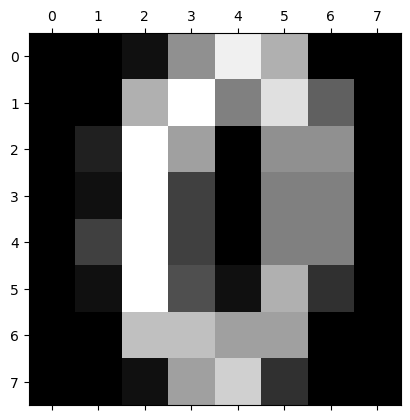

In [9]:
%matplotlib inline

plt.gray()
plt.matshow(digits.data[10].reshape(8,8))

In [10]:
# Was ist der 10the Eintrag?
digits.target[10]

0

In [20]:
# Zeigt einzigartige Werte von Target. Target enthält die Klassen. (1,2,3,4,4,6,7, ...,8, 9, 1, ...)
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Um weitere Möglichkeiten zu haben, und um zu trainieren, werden die Daten in ein Dataframe von Pandas überführt. 

In [13]:
training_set = pd.DataFrame(digits.data, columns=digits.feature_names)
training_set.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [14]:
# Damit wird der Tabelle noch eine Spalte hinzugefügt, um die Klasse zu sehen.
target_column = pd.DataFrame(digits.target, columns=['number'])

In [15]:
training_set  = pd.concat([training_set, target_column], axis="columns")
training_set.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [16]:
# Allgemeine Beschreibung
training_set.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Als Menschen können wir sehen, dass nicht alle Pixel relevant sind, um die dargestellte Zahl zu erkennen. Dasselbe gilt auch für andere Daten, die man recht gut überblicken kann.

Bei Daten mit wenigen Features können diese einfach entfernt werden. Bei Datasets mit über 30 Features und mehr wird es schon schwieriger  => PCA, um die wichtigsten Features zu identifizieren.

Durch .describe() ist sichtbar, welche der Pixel am relevantesten sind, um die Zahlen darzustellen. 

<i>Abb2</i>: Digit 0

<img src="./files_data/img/sklearn_PCA-notebook_2.PNG" width="400" height="400">

In der Abbildung 2 ist deutlich zu sehen, dass die Ränder weniger Relevant sind.

Alle Digits des Dataset sind möglichst mittig.

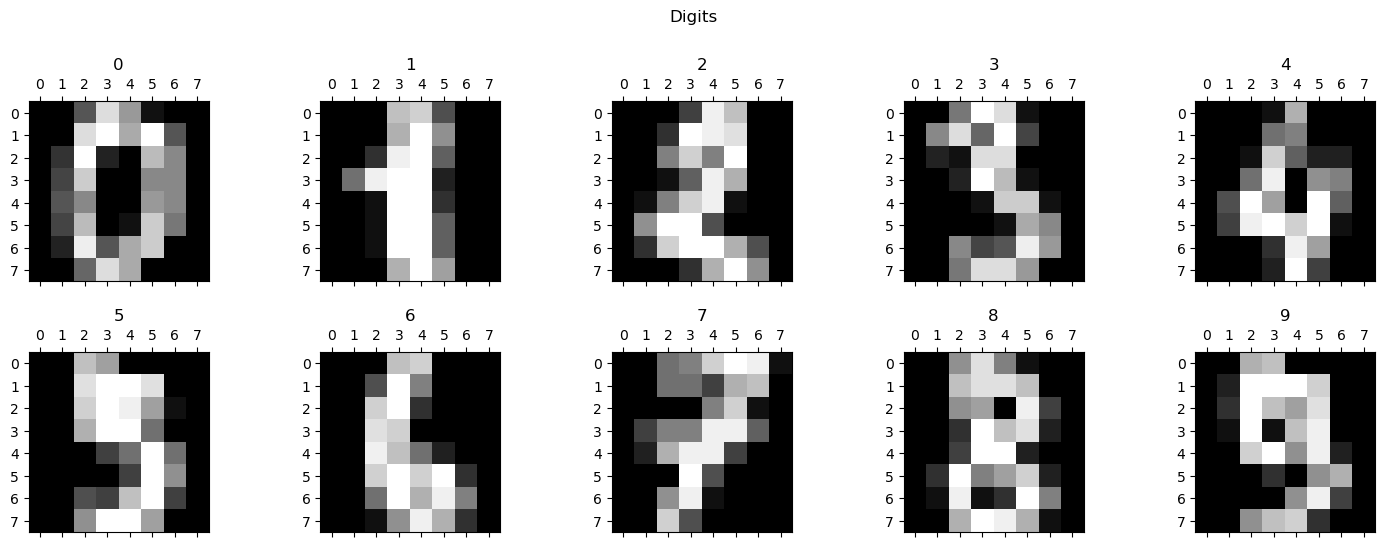

In [47]:
%matplotlib inline

# Plote Digits
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.suptitle('Digits')      
fig.tight_layout(pad=3.0)  
axs = axs.ravel()

for i in range(10):
    axs[i].set_title(digits.target[i])
    axs[i].matshow(digits.data[i].reshape(8,8))

In [52]:
from sklearn.model_selection import train_test_split # Teile Dataset auf in Train- und Testset
from sklearn.decomposition   import PCA              # Sklearn PCA
from sklearn.preprocessing   import StandardScaler   # Um die Daten zu skalieren 

Vor dem Training können die Daten skaliert werden, damit PCA besser arbeiten kann. Das wird wichtig, wenn der Größenbereich der Zahlen sehr unterschiedlich ist.

Wenn durch PCA Features wegfallen, kann es die Genauigkeit des Models negativ beeinflussen. Zum Beispiel wenn statt 100 Features nur 2 Features genutzt werden, wobei alle 100 wichtig sind. 

In [50]:
# X ist training_set ohne die Spalte "number"
X = training_set.drop(columns=["number"], axis="column")
X.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [51]:
y = digits.target

In [53]:
# X Skalieren
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2)

In [63]:
from sklearn.linear_model import LogisticRegression

my_model = LogisticRegression() 
my_model.fit(X_train, y_train)

LogisticRegression()

In [64]:
my_model.score(X_test, y_test)

0.9805555555555555

Die Genauigkeit ist jetzt schon ganz gut, nun kommt PCA ins Spiel.

PCA wird die Spalten neu berechnen.

In [73]:
pca   = PCA(n_components=35)  # 35 Features sollen übrigbleiben. 
X_PCA = pca.fit_transform(X)
X_PCA.shape                   # 35 Spalten.

(1797, 35)

In [74]:
pca   = PCA(.90)              # 90% der Features die den meisten Einfluss haben.
X_PCA = pca.fit_transform(X)
X_PCA.shape   

(1797, 21)

In [71]:
X_PCA

array([[ 2.1185529 , -3.5538568 , -0.04530566, ..., -0.27048194,
        -0.92391586, -0.74710485],
       [-1.76417292,  1.73317118,  0.06644377, ..., -0.64372511,
        -0.62244391, -0.28733651],
       [-0.98649407, -1.35595742, -3.11974226, ...,  0.10080075,
        -0.21141886, -0.23740558],
       ...,
       [-0.89850037,  1.49949225, -0.63406272, ...,  0.5715616 ,
         0.46194018, -0.55388791],
       [ 4.99045426, -0.33858632,  1.15788371, ..., -0.90362183,
         0.10985648,  0.32123273],
       [-3.22345218,  0.30200105,  0.77976019, ...,  0.61267079,
        -0.55098014, -0.97004672]])

In [75]:
# % "Wichtigkeit" der Features.
pca.explained_variance_ratio_ 

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2)

In [85]:
from sklearn.linear_model import LogisticRegression

my_model = LogisticRegression(max_iter=1200)  # max_iter erhöhen, damit der Gradientenabstieg abdecken kann. 
my_model.fit(X_train, y_train)
my_model.score(X_test, y_test)

0.9444444444444444

Die Parameter können weiter angepasst werden, um die Genauigkeit zu verbessern und um viele Features auf einige Wichtige zu begrenzen. 

In [77]:
# Als Dict: Übersicht, was alles entnommen werden kann. 
pca.__dict__

{'n_components': 0.9,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'feature_names_in_': array(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
        'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
        'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
        'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
        'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
        'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
        'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
        'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
        'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
        'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
        'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 